In [1]:
import basedosdados as bd
import matplotlib as plt
import pandas as pd

# Queries

# Índice de vulnerabilidade social por município
ivs = '''
SELECT id_municipio, avg(idhm_e) as idhm_e, 
            avg(idhm_r) as idhm_r, 
            avg(propocao_energia_eletrica) as propocao_energia_eletrica, 
            avg(proporcao_sem_agua_esgoto) as proporcao_sem_agua_esgoto,
            avg(ivs) as ivs
FROM `basedosdados.br_ipea_avs.municipio` 
WHERE ano = 2010
GROUP BY id_municipio
'''

In [2]:
vulnerabilidadeDf = bd.read_sql(ivs, billing_project_id="ps-analytica-a2-416401")
vulnerabilidadeDf

Downloading: 100%|██████████████████████| 5565/5565 [00:01<00:00, 4280.82rows/s]


,id_municipio,idhm_e,idhm_r,propocao_energia_eletrica,proporcao_sem_agua_esgoto,ivs
0,5300108,0.730750,0.790112,99.822923,1.254923,0.277082
1,1200013,0.462880,0.580520,94.713600,22.654000,0.433300
2,1200138,0.457435,0.604000,95.159130,23.071304,0.426100
3,1200344,0.360800,0.566560,75.079200,33.045200,0.513250
4,1200336,0.537760,0.580640,87.160400,49.060400,0.477500
...,...,...,...,...,...,...
5560,3549904,0.742773,0.763432,99.886250,1.355341,0.228228
5561,3550704,0.703103,0.737531,99.947812,1.549062,0.206130
5562,3554102,0.719627,0.737040,99.627067,0.369600,0.192919
5563,3554805,0.707121,0.745030,98.803333,1.602727,0.223417


<Axes: xlabel='IDH Municipal - Educação', ylabel='Índice de Vulnerabilidade Social'>

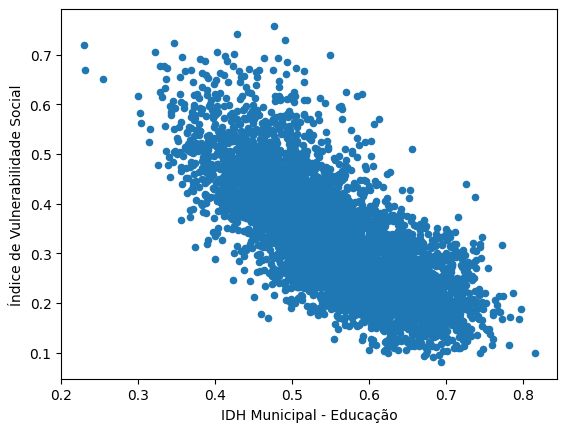

In [10]:
# Como o idhm_e é usado no cálculo do ivs, não é uma relação justa, mas
# vale observar que o mesmo gráfico para renda tem um formato muito mais
# estreito, ou seja, a relação renda/ivs é mais impactante do que a relação 
# educação/ivs, sugerindo que a renda impacte em mais fatores do cálculo do ivs,
# como acesso a infraestrutura e serviços básicos.
vulnerabilidadeDf.plot.scatter(xlabel='IDH Municipal - Educação', 
                               ylabel='Índice de Vulnerabilidade Social', 
                               x='idhm_e', y='ivs')

<Axes: xlabel='IDH Municipal - Renda', ylabel='Índice de Vulnerabilidade Social'>

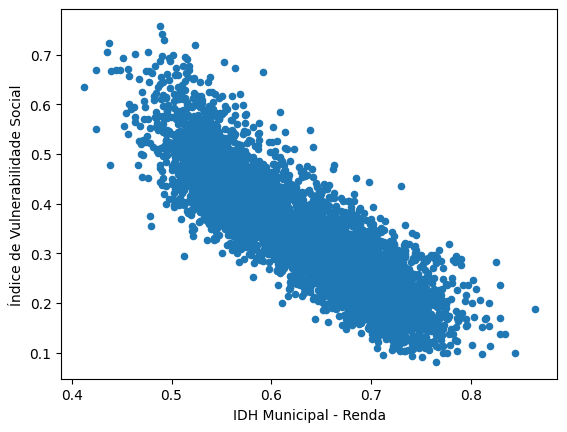

In [5]:
# Relação visivelmente mais direta
vulnerabilidadeDf.plot.scatter(xlabel='IDH Municipal - Renda', 
                               ylabel='Índice de Vulnerabilidade Social', 
                               x='idhm_r', y='ivs')

<Axes: xlabel='IDH Municipal - Renda', ylabel='Pop. sem saneamento adequado (%)'>

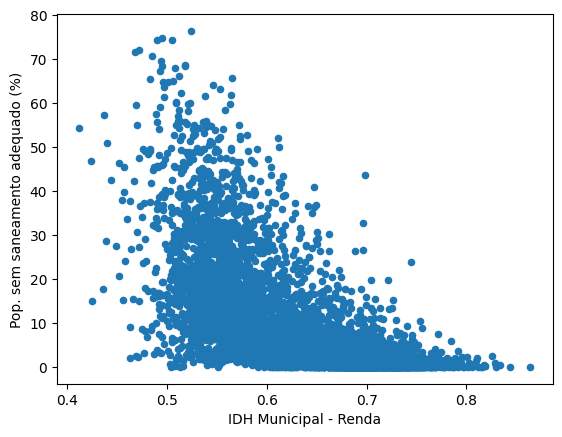

In [6]:
vulnerabilidadeDf.plot.scatter(xlabel='IDH Municipal - Renda', 
                               ylabel='Pop. sem saneamento adequado (%)', 
                               x='idhm_r', y='proporcao_sem_agua_esgoto')

<Axes: xlabel='IDH Municipal - Renda', ylabel='Pop. com acesso a energia elétrica (%)'>

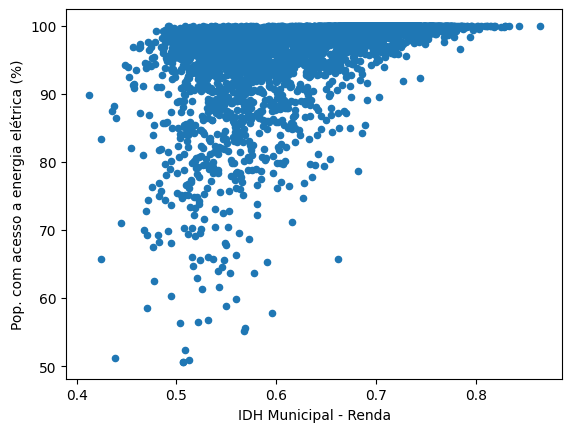

In [7]:
vulnerabilidadeDf.plot.scatter(xlabel='IDH Municipal - Renda', 
                               ylabel='Pop. com acesso a energia elétrica (%)', 
                               x='idhm_r', y='propocao_energia_eletrica')

<Axes: xlabel='IDH Municipal - Educação', ylabel='Pop. sem saneamento adequado (%)'>

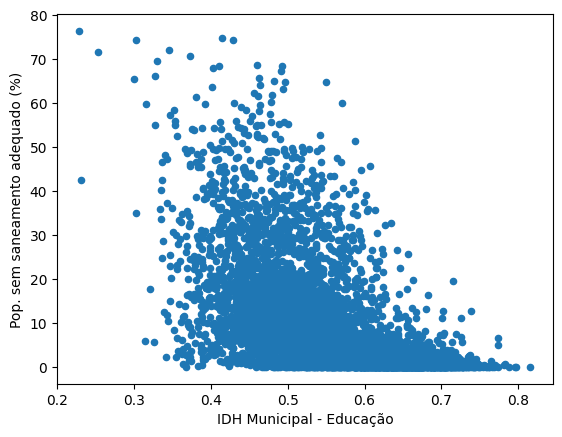

In [8]:
vulnerabilidadeDf.plot.scatter(xlabel='IDH Municipal - Educação', 
                               ylabel='Pop. sem saneamento adequado (%)', 
                               x='idhm_e', y='proporcao_sem_agua_esgoto')

<Axes: xlabel='IDH Municipal - Educação', ylabel='Pop. com acesso a energia elétrica (%)'>

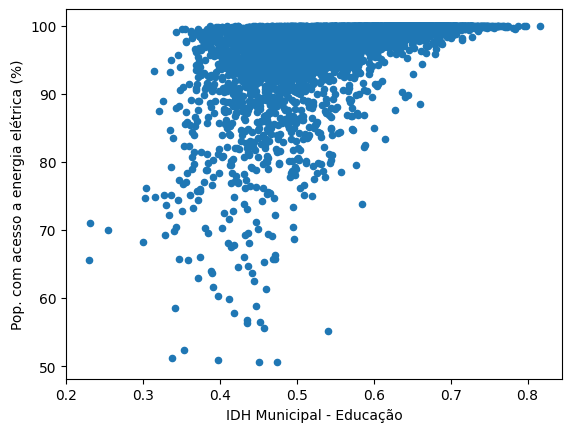

In [9]:
vulnerabilidadeDf.plot.scatter(xlabel='IDH Municipal - Educação', 
                               ylabel='Pop. com acesso a energia elétrica (%)', 
                               x='idhm_e', y='propocao_energia_eletrica')